In [1]:
import pandas as pd
df_id = pd.read_csv('/kaggle/input/abo-small/images/metadata/images.csv')
df_id

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg
...,...,...,...,...
398207,B1zv8OpTkBS,2560,2560,6d/6d49d130.jpg
398208,B1zwflWhPIS,2560,2560,b1/b163e0ea.jpg
398209,C1lf45DhhRS,2560,2560,a1/a116d9d1.jpg
398210,C1pEt6jBLiS,2560,2560,9c/9c3e1158.jpg


In [2]:
df_id[df_id.duplicated()]

,image_id,height,width,path


## Merging all the metadata together

In [3]:
import pandas as pd
import glob
import os

# 1. point to your folder of JSONs
json_folder = '/kaggle/input/abo-listings/listings/metadata'
pattern     = os.path.join(json_folder, '*.json')

# 2. decide on output CSV
out_csv = '/kaggle/working/all_listings.csv'
in_csv =  '/kaggle/input/all-listings/all_listings.csv'
if os.path.exists(in_csv):
    # CSV already there → just load it
    print(f"Found existing CSV, loading from {out_csv}")
    df = pd.read_csv(in_csv)
else:
    # CSV missing → read + merge all JSONs
    print("CSV not found, merging JSON files…")
    json_files = glob.glob(pattern)

    dfs = []
    for path in json_files:
        try:
            df_temp = pd.read_json(path, lines=True)
        except ValueError:
            df_temp = pd.read_json(path, lines=False)
        dfs.append(df_temp)

    df = pd.concat(dfs, ignore_index=True)
    print("Merged shape:", df.shape)

    df.to_csv(out_csv, index=False)
    print(f"Wrote merged DataFrame to {out_csv}")
    df = pd.read_csv(out_csv)

print("Columns:", df.columns.tolist())


Found existing CSV, loading from /kaggle/working/all_listings.csv
Columns: ['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'item_weight', 'material', 'model_name', 'model_number', 'product_type', 'main_image_id', 'other_image_id', 'item_keywords', 'country', 'marketplace', 'domain_name', 'node', 'style', 'item_dimensions', 'model_year', 'color_code', 'spin_id', '3dmodel_id', 'fabric_type', 'item_shape', 'pattern', 'product_description', 'finish_type']


In [4]:
df['product_type']

0         [{'value': 'CELLULAR_PHONE_CASE'}]
1                       [{'value': 'BENCH'}]
2                     [{'value': 'GROCERY'}]
3         [{'value': 'CELLULAR_PHONE_CASE'}]
4                     [{'value': 'GROCERY'}]
                         ...                
147697                   [{'value': 'LOCK'}]
147698            [{'value': 'DUTCH_OVENS'}]
147699                [{'value': 'GROCERY'}]
147700     [{'value': 'INKJET_PRINTER_INK'}]
147701                [{'value': 'KITCHEN'}]
Name: product_type, Length: 147702, dtype: object

In [5]:
import ast
df['product_type'] = df['product_type'].apply(ast.literal_eval)
df['product_type'] = df['product_type'].str[0].str['value']
df['product_type']

0         CELLULAR_PHONE_CASE
1                       BENCH
2                     GROCERY
3         CELLULAR_PHONE_CASE
4                     GROCERY
                 ...         
147697                   LOCK
147698            DUTCH_OVENS
147699                GROCERY
147700     INKJET_PRINTER_INK
147701                KITCHEN
Name: product_type, Length: 147702, dtype: object

In [6]:
df.columns

Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'item_weight',
       'material', 'model_name', 'model_number', 'product_type',
       'main_image_id', 'other_image_id', 'item_keywords', 'country',
       'marketplace', 'domain_name', 'node', 'style', 'item_dimensions',
       'model_year', 'color_code', 'spin_id', '3dmodel_id', 'fabric_type',
       'item_shape', 'pattern', 'product_description', 'finish_type'],
      dtype='object')

In [7]:
df['item_shape'].isna().sum()

142636

In [8]:
df['fabric_type'].isna().sum()

139509

In [9]:
df['style'].isna().sum()

104514

In [10]:
df['pattern'].isna().sum()

143112

## Removing irrelevant columns

In [11]:
#dropping all the irrelevant columns
#Also removing finish_type and pattern columns because of too many nan vlaues
df = df.drop(columns = ['brand','item_weight','model_number','country','marketplace','domain_name','node','item_dimensions',
       'model_year', 'color_code', 'spin_id', '3dmodel_id','finish_type','item_id','item_weight'])

In [12]:
df['material'].isna().sum()

94117

In [13]:
df

,bullet_point,color,item_name,material,model_name,product_type,main_image_id,other_image_id,item_keywords,style,fabric_type,item_shape,pattern,product_description
0,"[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...","[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Silicone'}]","[{'language_tag': 'en_IN', 'value': 'Samsung G...",CELLULAR_PHONE_CASE,71owAzvPFuL,"['61+woWTqkwL', '61SE4RTPjdL']","[{'language_tag': 'en_IN', 'value': 'Back Cove...",NaN,NaN,NaN,NaN,NaN
1,NaN,"[{'language_tag': 'en_US', 'value': 'Light Gre...","[{'language_tag': 'en_US', 'value': 'Light Gre...",NaN,NaN,BENCH,A114ZfnM0dL,NaN,NaN,"[{'language_tag': 'en_US', 'value': 'Raconteur...",NaN,NaN,NaN,NaN
2,"[{'language_tag': 'en_US', 'value': 'Brought t...",NaN,"[{'language_tag': 'en_US', 'value': '365 EVERY...",NaN,NaN,GROCERY,816oDloCY4L,"['51u3Lkk-R+L', '71jPhuf7zsL', '71vrYGQp3zL', ...",NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...","[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Silicon'}]","[{'language_tag': 'en_IN', 'value': 'Oppo A7'}]",CELLULAR_PHONE_CASE,71GmYaibrUL,"['61+woWTqkwL', '61SE4RTPjdL']","[{'language_tag': 'en_IN', 'value': 'Back Cove...",NaN,NaN,NaN,NaN,NaN
4,"[{'language_tag': 'en_US', 'value': 'Brought t...",NaN,"[{'language_tag': 'en_US', 'value': 'Engine 2,...",NaN,NaN,GROCERY,91w54-A-WFL,"['81XfutyF3UL', '61c2N2TghAL', '71aj6Lyz0TL', ...","[{'language_tag': 'en_US', 'value': 'Placehold...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147697,"[{'language_tag': 'sv_SE', 'value': 'Svart och...","[{'language_tag': 'sv_SE', 'value': '4-pack'}]","[{'language_tag': 'sv_SE', 'value': 'AmazonBas...",NaN,NaN,LOCK,61ZGzGxAWIL,"['714wTMO8jmL', '71ggEx8YfJL', '71OKuhjXNjL', ...","[{'language_tag': 'sv_SE', 'value': 'antal lås...",NaN,NaN,NaN,NaN,NaN
147698,"[{'language_tag': 'sv_SE', 'value': 'Röd 7,09 ...","[{'language_tag': 'sv_SE', 'value': 'Röd'}]","[{'language_tag': 'sv_SE', 'value': 'AmazonBas...",NaN,NaN,DUTCH_OVENS,81L8PyxZIbL,"['81nhm1WWlPL', '31JLf1Uoz-L', '81Xc0Cj4o2L', ...","[{'language_tag': 'sv_SE', 'value': 'staub cas...","[{'language_tag': 'sv_SE', 'value': 'Fältugn'}]",NaN,NaN,"[{'language_tag': 'sv_SE', 'value': 'singel'}]",NaN
147699,"[{'language_tag': 'en_US', 'value': 'Brought t...",NaN,"[{'language_tag': 'en_US', 'value': '365 EVERY...",NaN,NaN,GROCERY,51Z8EYhVfKL,"['81yxsVWLtlL', '81jHRKzShzL', '41gVK80FNuL', ...","[{'language_tag': 'en_US', 'value': 'whole foo...",NaN,NaN,NaN,NaN,NaN
147700,"[{'language_tag': 'es_ES', 'value': 'Cartuchos...","[{'language_tag': 'es_ES', 'value': 'Magenta'}...","[{'language_tag': 'es_ES', 'value': 'AmazonBas...",NaN,NaN,INKJET_PRINTER_INK,71cwmPsvKtL,"['71iVAbBa-GL', '71UUa0BImkL', '81XhpdeQfLL', ...","[{'language_tag': 'es_ES', 'value': 'tinta hp ...","[{'language_tag': 'es_ES', 'value': 'Cartucho ...",NaN,NaN,NaN,NaN


In [14]:
#Checking for duplicatesand dropping them
df = df.drop_duplicates()

## For now our goal is to have equal representation for each class(product_type) of object.

In [15]:
#Checking for entries in which the main_image_id or product_type is nan and removing them
df = df.dropna(subset = ['main_image_id'])
df = df.dropna(subset = ['product_type'])

In [16]:
df.shape

(146931, 14)

## Handling the metadata and converting it to a single column.Also we keep only the values for which language tag has en to reduce the final prompt size that we will give to Gemini

In [17]:
import ast
import pandas as pd
import warnings

# columns to keep *inside* metadata
meta_cols = [c for c in df.columns
             if c not in ("main_image_id", "other_image_id", "product_type")]

def keep_en(cell):
    # only try to eval strings
    if isinstance(cell, str):
        with warnings.catch_warnings(record=True) as warn_list:
            warnings.simplefilter("always", SyntaxWarning)
            try:
                val = ast.literal_eval(cell)
            except Exception:
                return cell
        # if any SyntaxWarning was caught, print the offending literal
        if warn_list:
            print("SyntaxWarning parsing literal:", cell)
            for w in warn_list:
                print("    •", w.message)
    else:
        val = cell

    # now filter for a list of dicts with language_tag→value
    if isinstance(val, list) and all(isinstance(d, dict) for d in val):
        en_vals = [
            d["value"]
            for d in val
            if d.get("language_tag", "").split("_", 1)[0] == "en"
        ]
        if not en_vals:
            return None
        return en_vals[0] if len(en_vals) == 1 else en_vals

    return cell

# apply the filter to every metadata column
for c in meta_cols:
    df[c] = df[c].apply(keep_en)

# collapse into three columns
df["metadata"] = df[meta_cols].to_dict(orient="records")
df = df[["main_image_id", "other_image_id", "product_type", "metadata"]].reset_index(drop=True)


In [18]:
df['metadata'][0]

{'bullet_point': ['Snug fit for Samsung Galaxy A10s, with perfect cut-outs for volume buttons, audio and charging ports',
  'Compatible with Samsung Galaxy A10s',
  'Easy to put & take off with perfect cutouts for volume buttons, audio & charging ports.',
  'Stylish design and appearance, express your unique personality.',
  'Extreme precision design allows easy access to all buttons and ports while featuring raised bezel to life screen and camera off flat surface.',
  'None'],
 'color': 'Multicolor',
 'item_name': 'Amazon Brand - Solimo Designer Chinnese Yin and Yang UV Printed Soft Back Case Mobile Cover for Samsung Galaxy A10s',
 'material': 'Silicone',
 'model_name': 'Samsung Galaxy A10s',
 'item_keywords': ['Back Cover',
  'Designer Case',
  'Designer Chinnese Yin and Yang Mobile Cover',
  'Flexible Case',
  'Printed Cover',
  'Samsung Galaxy A10s Case',
  'Silicone Case',
  'Soft TPU',
  'cases and covers',
  'fashion case',
  'mobile Cover'],
 'style': nan,
 'fabric_type': nan,


## We check for duplicates with subset main_image_is and product_type and then copy the values in other columns if present in the other copy

In [19]:
df.shape

(146931, 4)

In [20]:

#  Define a “first valid” helper that skips NaNs and empty dicts
def first_valid(series):
    # drop pandas‐NA
    nonnull = series.dropna().tolist()
    # also skip empty dicts
    nonempty = [x for x in nonnull if not (isinstance(x, dict) and len(x)==0)]
    return nonempty[0] if nonempty else pd.NA

#  Group by the two keys and aggregate
df = (
    df
    .groupby(['main_image_id', 'product_type'], as_index=False)
    .agg({
        'other_image_id': first_valid,
        'metadata'      : first_valid,
        # if you have other columns you want to preserve, decide how to agg them here
    })
)


In [21]:
df.shape

(126572, 4)

In [22]:
df

,main_image_id,product_type,other_image_id,metadata
0,010-mllS7JL,KITCHEN,<NA>,"{'bullet_point': nan, 'color': nan, 'item_name..."
1,01dkn0Gyx0L,KITCHEN,<NA>,"{'bullet_point': nan, 'color': nan, 'item_name..."
2,01sUPg0387L,KITCHEN,<NA>,"{'bullet_point': nan, 'color': nan, 'item_name..."
3,1168jc-5r1L,KITCHEN,<NA>,"{'bullet_point': nan, 'color': nan, 'item_name..."
4,11Y+Xpt1lfL,AV_FURNITURE,<NA>,"{'bullet_point': nan, 'color': nan, 'item_name..."
...,...,...,...,...
126567,B1zaWoxtyUS,OTTOMAN,<NA>,"{'bullet_point': nan, 'color': None, 'item_nam..."
126568,B1zaWoxtyUS,SOFA,<NA>,"{'bullet_point': nan, 'color': 'Emerald', 'ite..."
126569,B1zcg3T8Y5S,CHAIR,"['81-3KL49ykL', 'A1qEy7mgVML', '91nlwGrN+uL', ...","{'bullet_point': ['When it comes to style, you..."
126570,B1zgxPn45QS,SOFA,<NA>,"{'bullet_point': nan, 'color': 'Slate', 'item_..."


In [23]:
df.duplicated(subset = 'main_image_id').sum()

3061

In [24]:
df.duplicated(subset = ['main_image_id','product_type']).sum()

0

## There are still duplicates in the main_image_id folder.So we look at the product_type and keep the main_image_id in the product_type with less no of images.

In [25]:
df[df['main_image_id'] =='91+eX+8qX9L']
# There are some image_ids for which some rows have the metadata and some don't

,main_image_id,product_type,other_image_id,metadata
116600,91+eX+8qX9L,HOME,"['81ZRpTk7e5L', '911AsspoO-L', '81hmezCB02L', ...","{'bullet_point': nan, 'color': nan, 'item_name..."
116601,91+eX+8qX9L,HOME_FURNITURE_AND_DECOR,"['91zE309gIwL', '81hmezCB02L', '71-rwhALYIL', ...","{'bullet_point': nan, 'color': nan, 'item_name..."
116602,91+eX+8qX9L,WALL_ART,"['91k-ToQf+0L', '91zE309gIwL', '81mIyu81lUL', ...",{'bullet_point': ['The majesty of snow falling...


In [26]:
import pandas as pd

# Compute frequencies and sort by rarity
pt_counts = df['product_type'].value_counts()
df['pt_freq'] = df['product_type'].map(pt_counts)
df_sorted = df.sort_values('pt_freq', ascending=True)

# Pick the first row (rarest) and then fills in metadata
def pick_and_merge(group):
    # copy the chosen row
    chosen = group.iloc[0].copy()
    # start with its metadata (should be a dict)
    merged = dict(chosen['metadata'] or {})
    # walk through the rest of the group and fill any missing keys/values
    for meta in group['metadata'].iloc[1:]:
        if isinstance(meta, dict):
            for k, v in meta.items():
                # if chosen had no value for k (None/empty), grab v
                if (not merged.get(k)) and v:
                    merged[k] = v
    chosen['metadata'] = merged
    return chosen

#  Apply per-group, then clean up
df = (
    df_sorted
    .groupby('main_image_id', as_index=False)
    .apply(pick_and_merge)
    .reset_index(drop=True)
    .drop(columns='pt_freq')
)



/tmp/ipykernel_13/1566737555.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(pick_and_merge)


In [27]:
df[df['main_image_id'] =='91+eX+8qX9L']

,main_image_id,product_type,other_image_id,metadata
114359,91+eX+8qX9L,WALL_ART,"['91k-ToQf+0L', '91zE309gIwL', '81mIyu81lUL', ...",{'bullet_point': ['The majesty of snow falling...


In [28]:
df.iloc[10009,:]

main_image_id                                           614KvxqyCbL
product_type                                                   LOCK
other_image_id    ['81N5z9r8WXL', '71LmS0YpxML', '61L9f+Bt8IL', ...
metadata          {'bullet_point': None, 'color': 'Pack of 4', '...
Name: 10009, dtype: object

In [29]:
df['metadata'][10009]

{'bullet_point': None,
 'color': 'Pack of 4',
 'item_name': 'AmazonBasics - TSA Approved 4 Digit Cable Combination Lock, Pack of 4',
 'material': nan,
 'model_name': nan,
 'item_keywords': None,
 'style': None,
 'fabric_type': nan,
 'item_shape': nan,
 'pattern': nan,
 'product_description': nan}

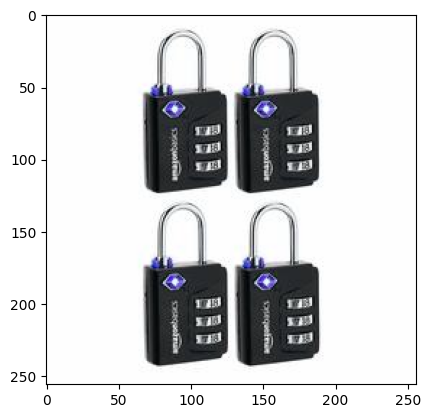

In [30]:
import cv2
path = os.path.join('/kaggle/input/abo-small/images/small',df_id[df_id['image_id'] == '81N5z9r8WXL']['path'].values[0])
img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
import matplotlib.pyplot as plt
plt.imshow(img)

## Preparing the final dataframe
1. Now for categories with less than 53 images,we use their other_image column.
2. We will create a new image_id column.It will have main_image_ids and other_images of categories with less images
3. Finally the df should have 3 columns : ['image_id','product_type','metadata']
4. Each product_type must have the same number of total images.


In [31]:
(df['product_type'].value_counts() < 53).sum()

414

In [32]:
import pandas as pd
import random
from ast import literal_eval

# Make sure other_image_id is an actual list (not a string)
def _ensure_list(x):
    if pd.isna(x):
        return []
    if isinstance(x, str):
        return literal_eval(x)
    return x

df['other_image_id'] = df['other_image_id'].apply(_ensure_list)

#  Prepare storage
output = []

#  Process each category
for ptype, grp in df.groupby('product_type'):
     # shuffle for randomness
    grp = grp.sample(frac=1, random_state=42)
    
    # rename main_image_id → image_id
    mains = grp[['main_image_id','metadata']] \
              .rename(columns={'main_image_id':'image_id'})
    
    if len(mains) >= 53:
        # just pick 53 mains
        picked = mains.sample(n=53, random_state=42)
    else:
        # take all mains, then supplement
        picked = mains.copy()
        needed = 53 - len(picked)
        
        # flatten other_image_id → (image_id, metadata)
        others = []
        for _, row in grp.iterrows():
            for oid in row['other_image_id']:
                others.append({
                    'image_id': oid,
                    'metadata': row['metadata']
                })
        if others:
            others_df = pd.DataFrame(others).drop_duplicates('image_id')
            n_pick = min(needed, len(others_df))
            pick_others = others_df.sample(n=n_pick, random_state=42)
            picked = pd.concat([picked, pick_others], ignore_index=True)
    
    # tag with product_type and collect
    picked['product_type'] = ptype
    output.append(picked)

# 4. Concatenate and reorder columns
new_df = pd.concat(output, ignore_index=True)[['image_id','product_type','metadata']]


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22048 entries, 0 to 22047
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   image_id      22048 non-null  object
 1   product_type  22048 non-null  object
 2   metadata      22048 non-null  object
dtypes: object(3)
memory usage: 516.9+ KB


In [34]:
(new_df['product_type'].value_counts() < 53).sum()

251

In [35]:
new_df.shape

(22048, 3)

There are still 251 categories with less than 53 images
From here we can have 2 approached:
1. Leave them as they are.
2. RandomOversampling of the images by trying to change some things like color etc.

In [36]:
df_id['image_id'] = df_id['image_id'].astype(str)
new_df['image_id'] = new_df['image_id'].astype(str)

In [37]:
# Joing with df_id to get the paths
final_df = new_df.join(df_id.set_index('image_id'),on='image_id',how='left')

In [38]:
(final_df['path'].isna()).sum()

0

In [39]:
final_df.shape

(22048, 6)

We split this df into two so we can use 2 apis to curate the data simultaneously.

In [40]:
n = final_df.shape[0]//2
first_half = final_df.iloc[:n]
second_half = final_df.iloc[n:]
print(first_half.shape)
print(second_half.shape)

(11024, 6)
(11024, 6)


In [41]:
first_half.to_csv('/kaggle/working/ids_without_oversampling1.csv',index=False)
second_half.to_csv('/kaggle/working/ids_without_oversampling2.csv',index=False)